In [ ]:
#OpenCV module
import cv2

import os
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
#Downloading haarcascade face recognizers
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2023-11-22 11:31:55--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.07s   

2023-11-22 11:31:56 (13.5 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



In [ ]:
#there is no label 0 in our training data indexes start from 1
subjects = ["", "Virat Kohli", "Rohit Sharma"]

In [ ]:
#function to detect face using OpenCV
def detect_face(img):
 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
 faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
 if (len(faces) == 0):
  return None, None
 x, y, w, h = faces[0]
 return gray[y:y+w, x:x+h], faces[0]

In [ ]:
#this function will read all persons' training images, detect face from each image
def prepare_training_data(data_folder_path):
 dirs = os.listdir(data_folder_path)
 faces = []
 labels = []
 for dir_name in dirs:
  if not dir_name.startswith("s"):
    continue;
  label = int(dir_name.replace("s", ""))
  subject_dir_path = data_folder_path + "/" + dir_name
  subject_images_names = os.listdir(subject_dir_path)

  for image_name in subject_images_names:
   if image_name.startswith("."):
     continue;
   image_path = subject_dir_path + "/" + image_name
   image = cv2.imread(image_path)
   cv2.waitKey(100)
   face, rect = detect_face(image)
   if face is not None:
    faces.append(face)
    labels.append(label)

 cv2.destroyAllWindows()
 cv2.waitKey(1)
 cv2.destroyAllWindows()
 return faces, labels

In [ ]:
#preparing training data
print("Preparing data...")
faces, labels = prepare_training_data("/content/drive/MyDrive/codetice/dataset")
print("Data prepared")

#print total faces and labels that are recognised
print("Total faces: ", len(faces))
print("Total labels: ", len(labels))

Preparing data...
Data prepared
Total faces:  21
Total labels:  21


In [ ]:
#create our LBPH face recognizer
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

In [ ]:
#train our face recognizer of our training faces
face_recognizer.train(faces, np.array(labels))

In [ ]:
#function to draw rectangle on image
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

#function to draw text on give image
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [ ]:
#function to recognizes the person in image passed and draw a rectangle over it
def predict(test_img):
 img = test_img.copy()
 face, rect = detect_face(img)
 label = face_recognizer.predict(face)
 label_text = subjects[label[0]]

 draw_rectangle(img, rect)
 draw_text(img, label_text, rect[0], rect[1]-5)
 return img

Predicting images...
Prediction complete


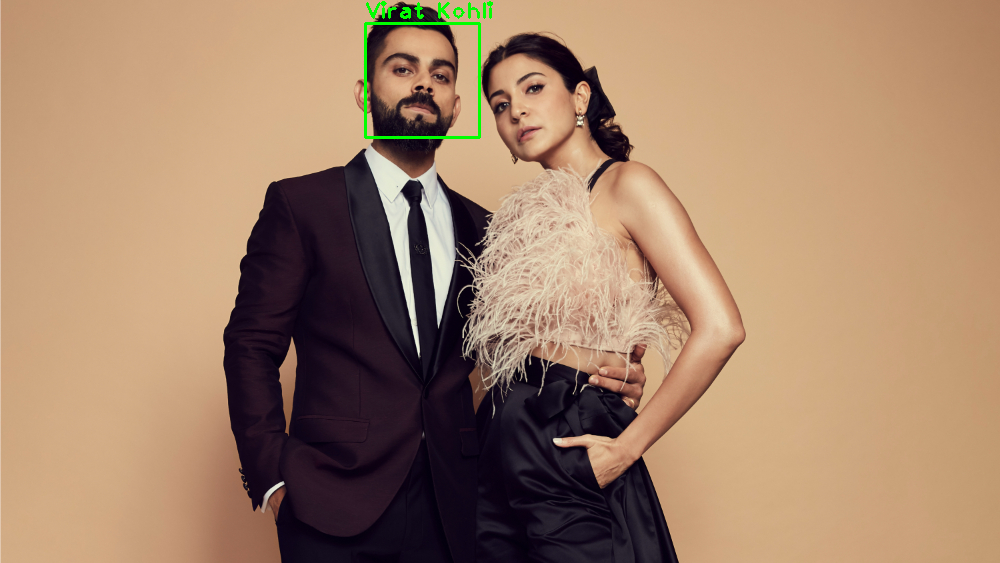

In [ ]:
print("Predicting images...")
test_img1 = cv2.imread("/content/p2.jpg")
predicted_img1 = predict(test_img1)
print("Prediction complete")
cv2_imshow(predicted_img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


Predicting images...
Prediction complete


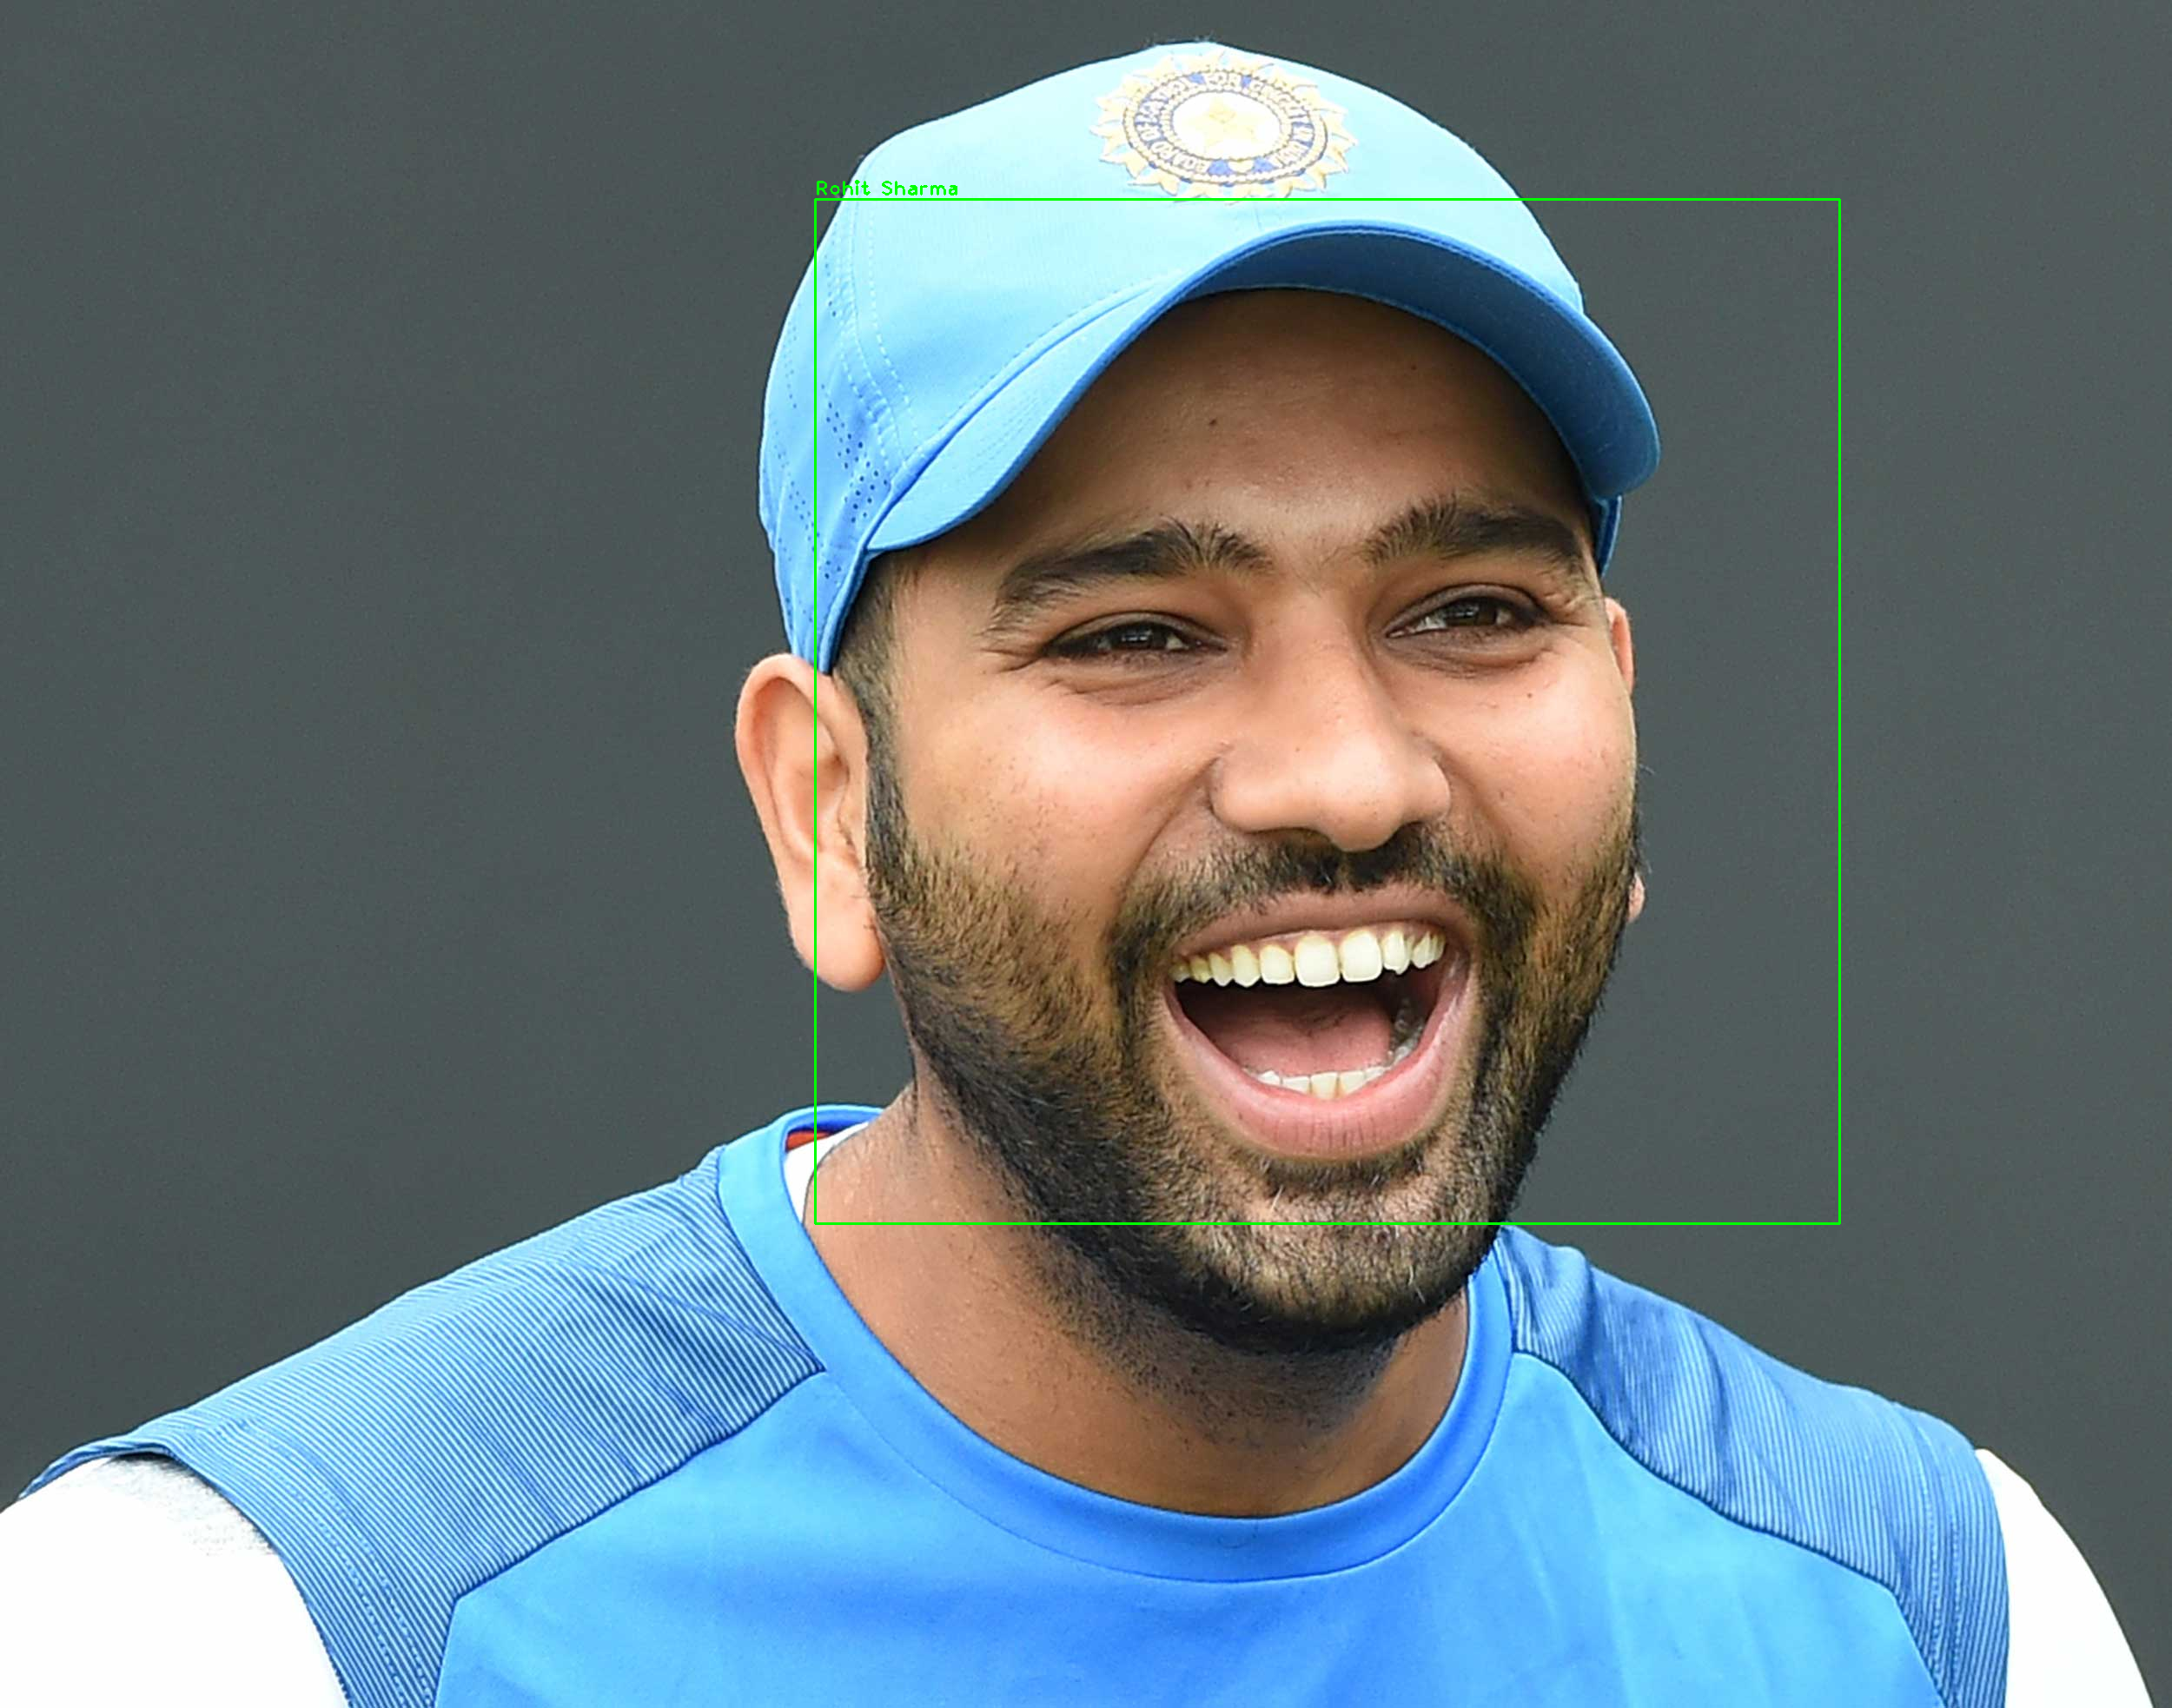

In [ ]:
print("Predicting images...")
test_img1 = cv2.imread("/content/p1.jpg")
predicted_img1 = predict(test_img1)
print("Prediction complete")
cv2_imshow(predicted_img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
!pip install astropy>=3.1
!pip install sunpy
!pip install streamlit==1.24.0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 27.2 MB/s eta 0:00:00


In [ ]:
%%writefile app5.py
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow
import streamlit as st
from PIL import Image

st.title("FACE DETECTION AND RECOGNITION")
st.text("The following AI will help you recognise Virat Kohli and Rohit Sharma")
st.text("in the given image")
subjects = ["", "Virat Kohli", "Rohit Sharma"]

def detect_face(img):
 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
 faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5);
 if (len(faces) == 0):
  return None, None
 x, y, w, h = faces[0]
 return gray[y:y+w, x:x+h], faces[0]

def prepare_training_data(data_folder_path):
 dirs = os.listdir(data_folder_path)
 faces = []
 labels = []
 for dir_name in dirs:
  if not dir_name.startswith("s"):
    continue;
  label = int(dir_name.replace("s", ""))
  subject_dir_path = data_folder_path + "/" + dir_name
  subject_images_names = os.listdir(subject_dir_path)

  for image_name in subject_images_names:
   if image_name.startswith("."):
     continue;
   image_path = subject_dir_path + "/" + image_name
   image = cv2.imread(image_path)
   cv2.waitKey(100)
   face, rect = detect_face(image)
   if face is not None:
    faces.append(face)
    labels.append(label)

 cv2.destroyAllWindows()
 cv2.waitKey(1)
 cv2.destroyAllWindows()
 return faces, labels

def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

def predict(test_img):
 img = test_img.copy()
 face, rect = detect_face(img)
 label = face_recognizer.predict(face)
 label_text = subjects[label[0]]

 draw_rectangle(img, rect)
 draw_text(img, label_text, rect[0], rect[1]-5)
 return img

def load_image(image_file):
	img = Image.open(image_file)
	return img

faces, labels = prepare_training_data("/content/drive/MyDrive/codetice/dataset")
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.train(faces, np.array(labels))

uploaded_file = st.file_uploader("Choose a jpg file",type='jpg')
if uploaded_file!=None:
 bytes_data = uploaded_file.read()
 img = load_image( uploaded_file)
 with open(uploaded_file.name,'wb') as f:
    f.write(uploaded_file.getbuffer())
 test_img = cv2.imread('/content/{}'.format(uploaded_file.name))
 predicted_img = predict(test_img)
 st.image(predicted_img)


Overwriting app5.py


In [ ]:
!streamlit run app5.py & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.231.92.25
[..................] / rollbackFailedOptional: verb npm-session 71ff85653c03e81


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.231.92.25:8501

npx: installed 22 in 3.288s
your url is: https://five-coats-give.loca.lt
